<a href="https://colab.research.google.com/github/rrbalaji/Prodigy_DS_05/blob/main/Prodigy_DS_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
#Generate synthetic data
np.random.seed(0)
n_samples=1000

In [4]:
#Simulae road conditions(0:dry, 1:wet, 2:icy)
road_conditions=np.random.choice(['Dry','Wet','Icy'],size=n_samples)


In [5]:
#Simulate weather conditions (0:clear, 1:rainy, 2:snowy)
weather_conditions=np.random.choice(['clear','rainy','snowy'],size=n_samples)


In [7]:
#simulate time of day (0-23hours)
time_of_day=np.random.randint(0,24,size=n_samples)


In [8]:
#simulate accident locations (latitude and longitude)
latitude = np.random.uniform(40,41,size=n_samples)
longitude = np.random.uniform(-74,-73,size=n_samples)


In [9]:
#simulate accident severity (random integers from 1 to 5)
severity = np.random.randint(1,6,size=n_samples)

In [37]:
#create a synthetic dataframe
data=pd.DataFrame({
    'road_condition': road_conditions,
    'weather':weather_conditions,
    'time_of_day':time_of_day,
    'latitude':latitude,
    'longitude': longitude,
    'severity':severity
    })
print(data)

    road_condition weather  time_of_day   latitude  longitude  severity
0              Dry   rainy           16  40.311375 -73.126311         5
1              Wet   rainy            7  40.768236 -73.159337         1
2              Dry   rainy           10  40.844481 -73.360629         3
3              Wet   rainy           13  40.093299 -73.756035         4
4              Wet   clear           16  40.128744 -73.188755         5
..             ...     ...          ...        ...        ...       ...
995            Icy   clear           17  40.329621 -73.191543         3
996            Wet   snowy           17  40.380775 -73.363572         3
997            Dry   clear            5  40.893421 -73.201464         2
998            Icy   rainy            9  40.648985 -73.427683         5
999            Icy   snowy            6  40.247972 -73.971353         4

[1000 rows x 6 columns]


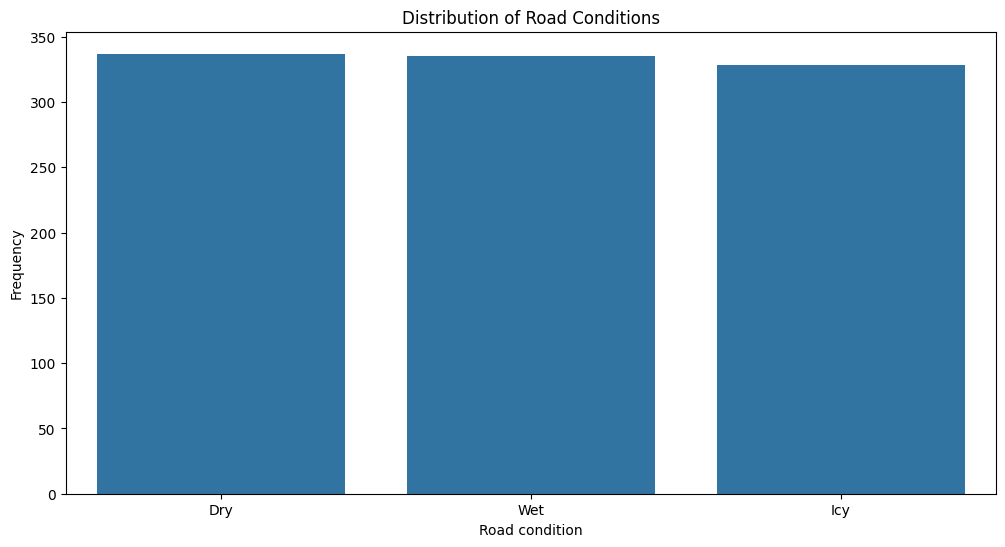

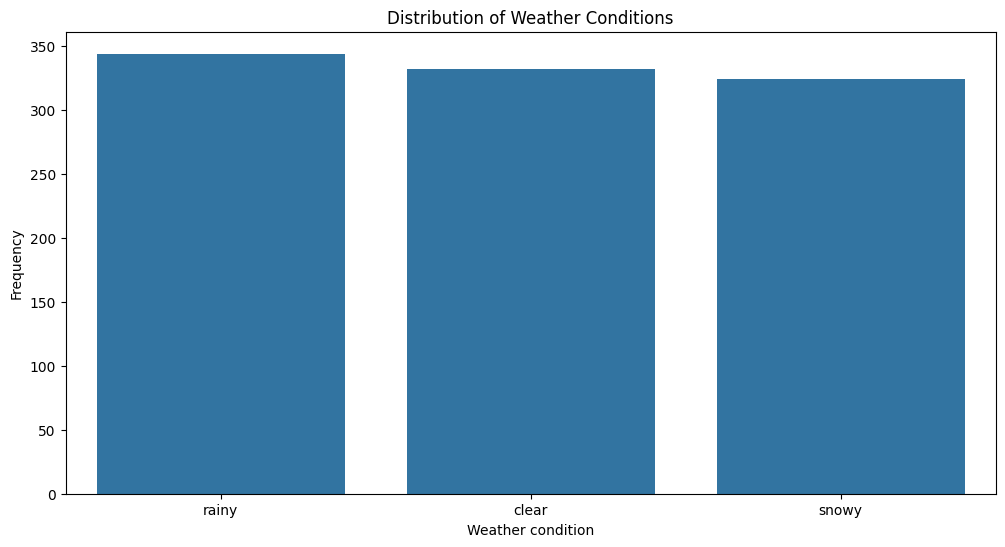

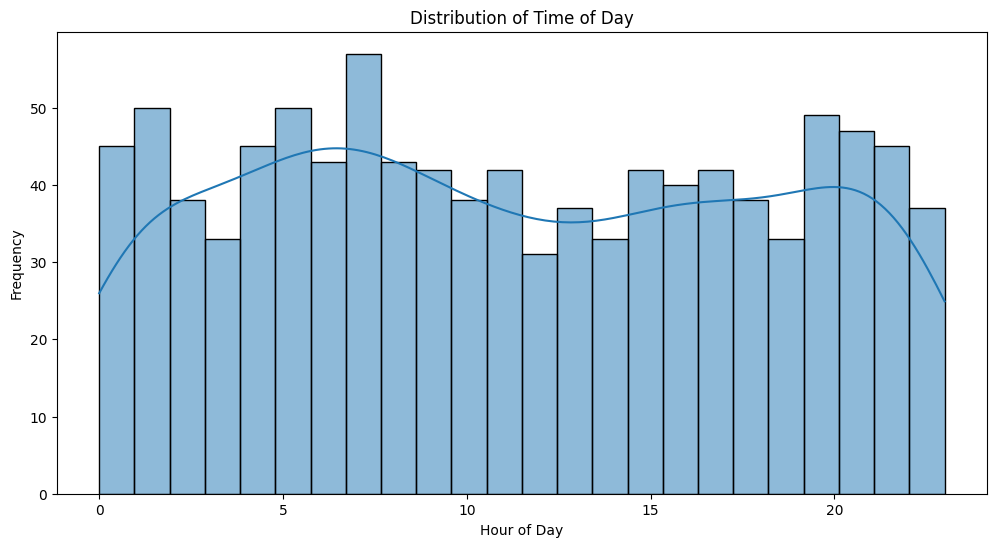

In [27]:
#Data preprocessing
#Exploratory data analysis(EDA)
#visualize distributions of road conditions, weather, and time of day
plt.figure(figsize=(12,6))
sns.countplot(x='road_condition',data=data)
plt.title('Distribution of Road Conditions')
plt.xlabel('Road condition')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(x='weather',data=data)
plt.title('Distribution of Weather Conditions')
plt.xlabel('Weather condition')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(data['time_of_day'],bins=24,kde=True)
plt.title('Distribution of Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.show()

In [38]:
#indentify accident hotspot using clustering (k-means)
X=data[['latitude', 'longitude']]
kmeans=KMeans(n_clusters=5, random_state=0).fit(X)
data['cluster']=kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


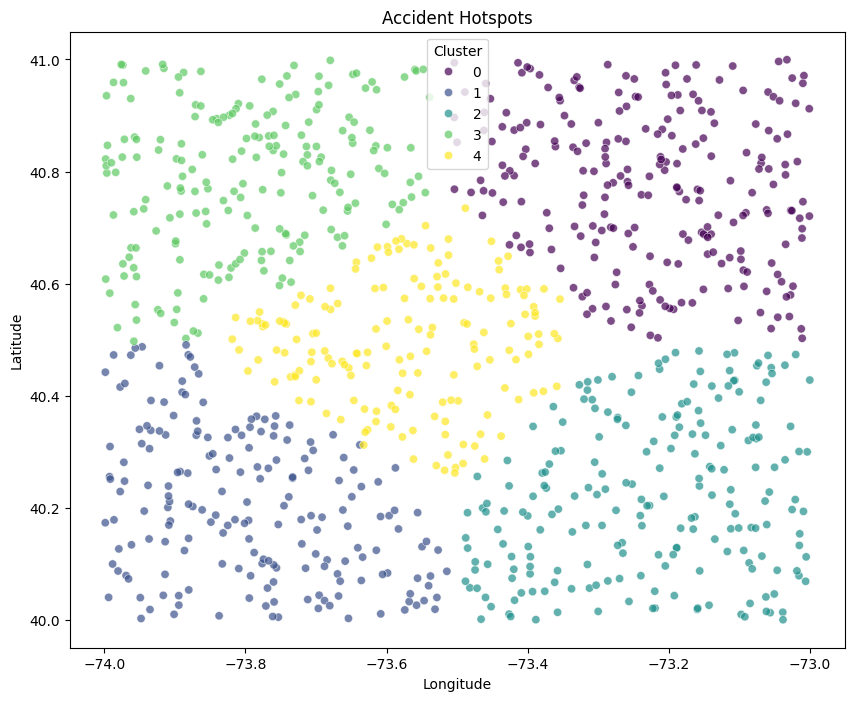

In [42]:
#visualize accident hotspots
plt.figure(figsize=(10,8))
sns.scatterplot(x='longitude', y='latitude', hue='cluster', data=data, palette='viridis', alpha=0.7)
plt.title('Accident Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()

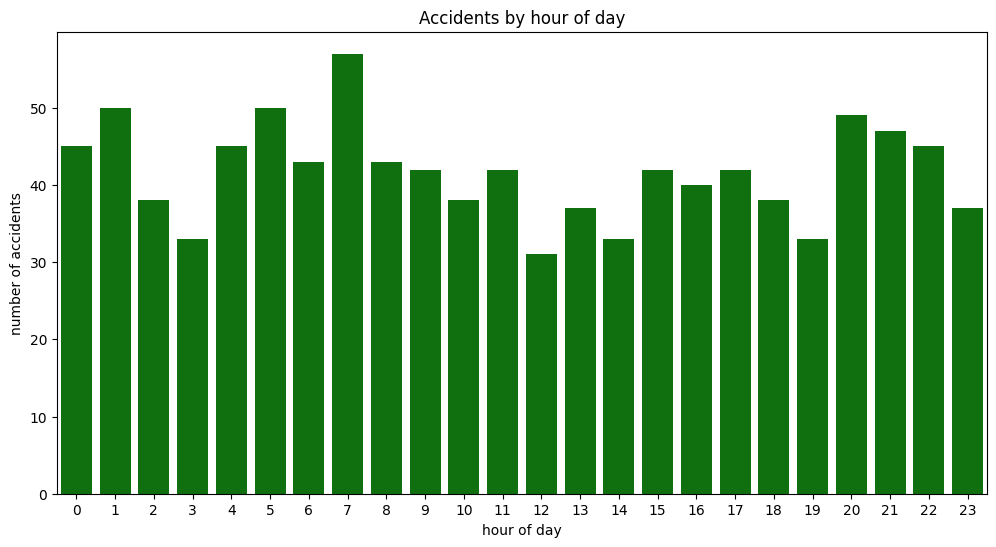

In [44]:
#Time of Day Analysis
plt.figure(figsize=(12,6))
sns.countplot(x='time_of_day',data=data,color='green')
plt.title('Accidents by hour of day')
plt.xlabel('hour of day')
plt.ylabel('number of accidents')
plt.show()

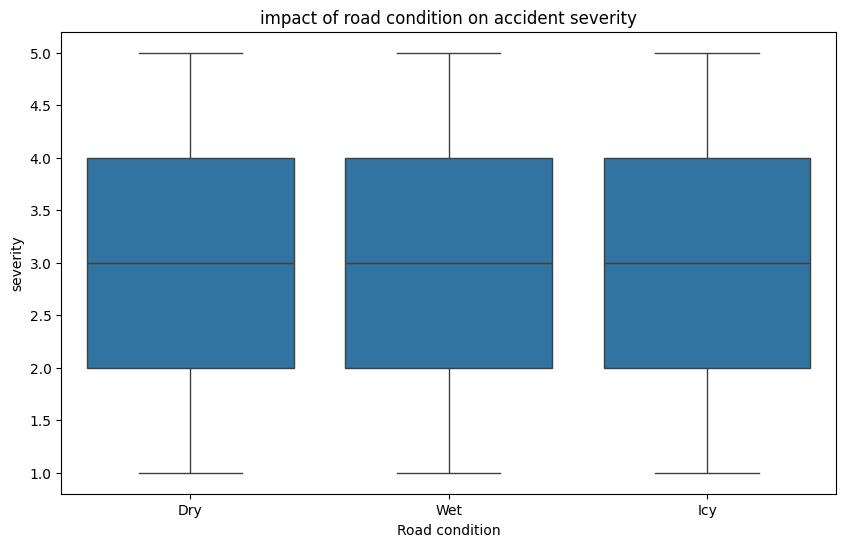

In [45]:
#factor analysis
plt.figure(figsize=(10,6))
sns.boxplot(x='road_condition',y='severity',data=data)
plt.title('impact of road condition on accident severity')
plt.xlabel('Road condition')
plt.ylabel('severity')
plt.show()